# K-Means Clustering

K-means is an **unsupervised learning** algorithm that learns the features of a dataset and tries to "figure out" the groups (categories, which are the "k" value) based on similarities. These groups are classified by their distance to a **centroid**, which is the mean of a cluster group. K-means can help identify segments of data points that have similar features, even though they may not belong to the same target category. Unsupervised learning is less about trying to predict the correct categories, moreso than it is about finding trends of data points that seem to be similar. 

![Supervised vs Unsupervised learning](https://notebooks.azure.com/priesterkc/projects/testdb/raw/kmeans_cluster.png)

Source: [Towards Data Science: Unsupervised Learning with Python](https://towardsdatascience.com/unsupervised-learning-with-python-173c51dc7f03)

Assignment -
Download this dataset from Kaggle (Links to an external site.)Links to an external site. and use the K-Means Clustering algorithm to explore patterns in the dataset. Choose a few features (2~4) of the dataset to compare (for example, what do the clustering patterns of credit limit vs balance look like?, etc.) and feel free to try out different numbers of clusters. Use visualization if needed to identify trends in this data.

In [1]:
from sklearn.cluster import KMeans  #algorithm in sklearn library to do k-means clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#use dataset with
location = "CreditCardData.csv"
df = pd.read_csv(location)

#in this dataframe, features 1 & 2 are the characteristics of each data point (predictive features) 
#C is the target variable (categories to predict)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [3]:
#find columns that have missing values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
df.dropna(axis=0,inplace=True)
#This will drop the missing values in rows

In [5]:
#find columns that have missing values
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [6]:
#Create dataframe with just four columns - Call new datafroma dfNew
dfNew = df[['CREDIT_LIMIT','BALANCE', 'PURCHASES','PAYMENTS']]
dfNew

,CREDIT_LIMIT,BALANCE,PURCHASES,PAYMENTS
0,1000.0,40.900749,95.40,201.802084
1,7000.0,3202.467416,0.00,4103.032597
2,7500.0,2495.148862,773.17,622.066742
4,1200.0,817.714335,16.00,678.334763
5,1800.0,1809.828751,1333.28,1400.057770
6,13500.0,627.260806,7091.01,6354.314328
7,2300.0,1823.652743,436.20,679.065082
8,7000.0,1014.926473,861.49,688.278568
9,11000.0,152.225975,1281.60,1164.770591
10,1200.0,1293.124939,920.12,1083.301007


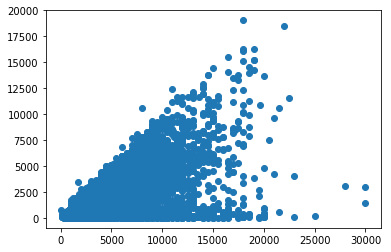

In [7]:
#plot data points to visually see where they are
#on small and distinctive dataset, easier to see clusters
plt.scatter(df['CREDIT_LIMIT'],df['BALANCE'])

In [8]:
import seaborn as sns
#this will do multiple plots 

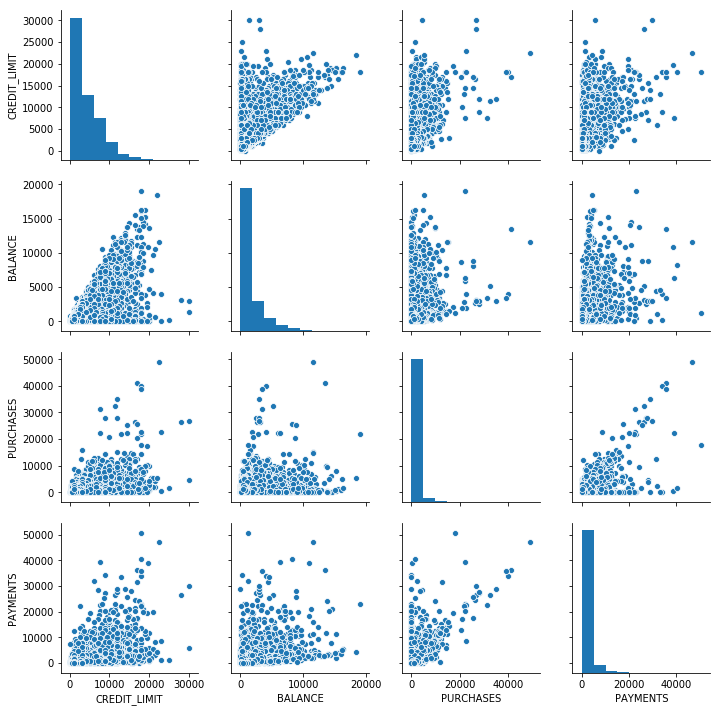

In [9]:
sns.pairplot(dfNew,kind='scatter', palette='husl')
plt.show()

In [10]:
X=dfNew[['CREDIT_LIMIT','BALANCE','PURCHASES','PAYMENTS']]

In [11]:
#initialize k-means function
#set number of clusters to categorize = 3 - this is the no of groups you will get
kmeans = KMeans(n_clusters=3)

#the model will learn which data points seem similar
#calculates centroids
#classfies data points in clusters based on distance to centroids
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
#data point coordinates for centroids of each cluster
#index 0 is blue cluster
#index 1 is yellow cluster
#index 2 is purple cluster
#index 3 is red cluster
print(kmeans.cluster_centers_)

[[ 8952.57159331  3206.00731786  1578.11556871  2753.79656451]
 [ 2635.23500948   910.90948527   606.47251916  1050.62313415]
 [12449.63768116  4777.99270916 10173.24391304 17786.61092825]]


In [13]:
X['category']=kmeans.labels_
#Here we added a column category in the dataset dfNew

In [14]:
X.head()

,CREDIT_LIMIT,BALANCE,PURCHASES,PAYMENTS,category
0,1000.0,40.900749,95.40,201.802084,1
1,7000.0,3202.467416,0.00,4103.032597,0
2,7500.0,2495.148862,773.17,622.066742,0
4,1200.0,817.714335,16.00,678.334763,1
5,1800.0,1809.828751,1333.28,1400.057770,1


(0, 22000)

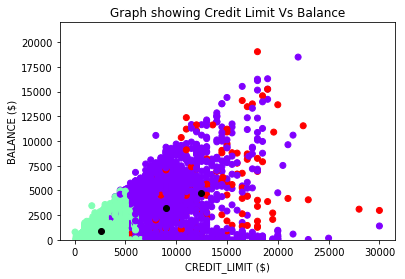

In [34]:
#scatterplot of original categories with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(X['CREDIT_LIMIT'],X['BALANCE'], c=X['category'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

plt.title('Graph showing Credit Limit Vs Balance')
plt.xlabel('CREDIT_LIMIT ($)') #this is the label name
plt.ylabel('BALANCE ($)') #this is the label name
    
#Limits for y axis
plt.ylim(0,22000)


(0, 52000)

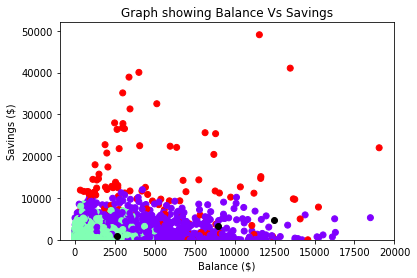

In [35]:
#scatterplot of original categories with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(X['BALANCE'],X['PURCHASES'], c=X['category'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

plt.title('Graph showing Balance Vs Savings')
plt.xlabel('Balance ($)') #this is the label name
plt.ylabel('Savings ($)') #this is the label name
    
#Limits for y axis
plt.ylim(0,52000)

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

Saving this for later. Not relevant here.

# length, breath and depth
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = X['CREDIT_LIMIT']
ys = X['BALANCE']
zs = X['PAYMENTS']

ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w',cmap='rainbow')

data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == 'red' else 'yellow' for wt in list(X['category'])]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)
    ax.set_title('3-D Graph of Credit Limit, Balance and Payment')
    #plt.title('3-D Graph of Credit Limit, Balance and Payment') - Can also use this
    ax.set_xlabel('CREDIT_LIMIT ($)') #this is the label name
    ax.set_ylabel('BALANCE ($)') #this is the label name
    ax.set_zlabel('PAYMENT ($)') #this is the label name
    
#fig = plt.figure()
#ax = fig.add_subplot(111, projection = '3d')
#ax.set_xlabel('BALANCE')
#ax.set_ylabel('TENURE')
#ax.set_zlabel('CREDIT_LIMIT')
#ax.set_title("Credit Card Clustering - 3D Plotting", fontsize=25, fontweight=3)
#ax.scatter(df['BALANCE'], df['TENURE'], df['CREDIT_LIMIT'], c=df['Balance_Group'], marker='o')
#plt.show
    
    